#Problem Statement:
Read the superstore data and forecast about the sales of furniture for the next year

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)

##Importing and Reading dataset

In [ ]:
df = pd.read_csv("/content/superstore_data.csv",encoding='latin-1',header=0)

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


##EDA

In [ ]:

df.shape

(2121, 21)

In [ ]:
df["Category"].value_counts() # to_check the categorical variables.

Furniture    2121
Name: Category, dtype: int64

In [ ]:
furniture = df.loc[df["Category"]=='Furniture'] # sub setting the data
furniture.shape

(2121, 21)

In [ ]:
furniture.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
# if we have given string date_time then we can covert it with to_datetime from pandas library.
furniture["Order Date"]= pd.to_datetime(furniture["Order Date"])

In [ ]:
furniture["Order Date"].min(), furniture["Order Date"].max() # checking for the maximum and minimum dates. we will covert date columns in indexing later however the date column require the cleanihng a bit

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

##Pre-proccessing

In [ ]:
# creating the one dimension data
furniture = furniture[["Order Date","Sales"]]
furniture.shape


(2121, 2)

In [ ]:
#sorting data into chronological order to avoid jumple graph to go in the forward direction
furniture = furniture.sort_values("Order Date", ascending = True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture.head(10)

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940
1024,2014-01-13,333.999
1355,2014-01-14,61.960
200,2014-01-16,127.104
1131,2014-01-19,181.470
1326,2014-01-20,272.940


In [ ]:

# multiple entries belonging to the same date. Hence we will perform groupby function. using sum to know in 13 of jan how many transaction happen.
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index() #(to get one index number. we have reset the index which gives of the observation 0,1,2)
furniture.shape

(889, 2)

In [ ]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [ ]:
#equally spaced time interval
#resample rolling up the data into monthly level 48 entries.
# we do resample on the basis of indexing column
furniture = furniture.set_index("Order Date")


In [ ]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [ ]:
y = furniture["Sales"].resample("MS").mean() #"W" is for week 
print(y.shape)
y

(48,)


Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

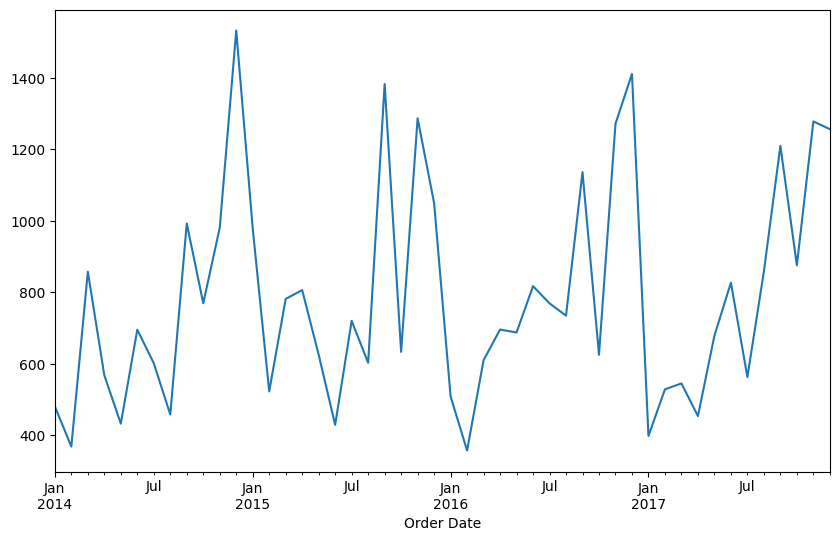

In [ ]:
y.plot(figsize=(10,6))
plt.show()

In [ ]:
# 1st 3 years data will go under training 36 months.
# last year data will keep for validation testing 12 months.
# then we will forecast the data for 2018

train = y.loc[:"2016-12-01"]
train.tail()
train.shape

(36,)

In [ ]:
# in time series forecasting there is no actual testing data cause we just consider y variable and forecasting futher period ahead, test data is only validation data
test = y.loc["2017-01-01":]
test.tail()
test.shape


(12,)

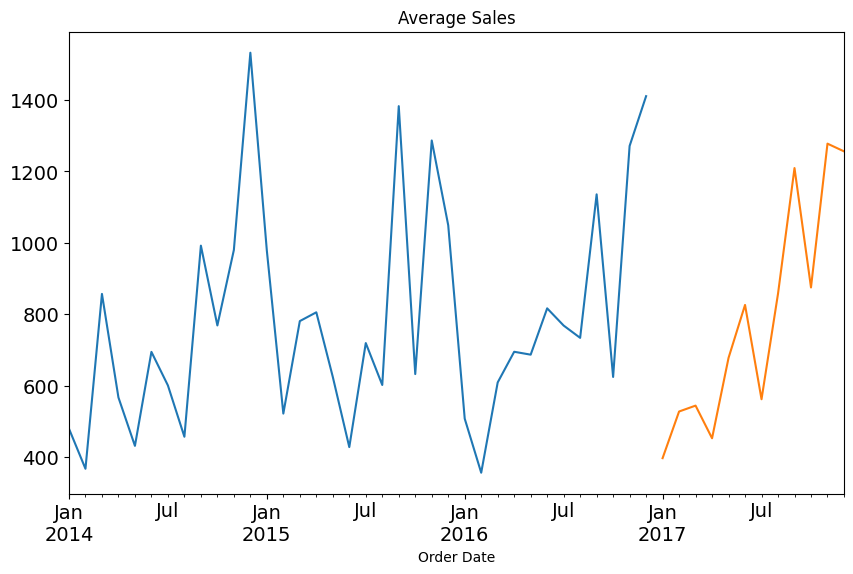

In [ ]:
# plotting data
train.plot(figsize=(10,6),title = "Average Sales", fontsize=14)
test.plot(figsize=(10,6), title = "Average Sales", fontsize =14)
plt.show()

In [ ]:
 # blue line is for training data and yellow data is for validation

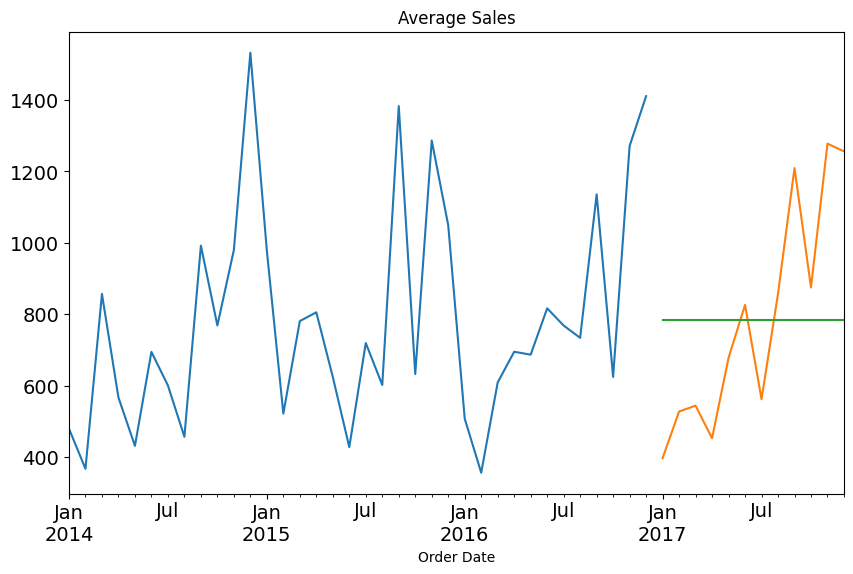

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level = alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp campared to the recent values.
#values class to 1 indicate that older valuses are equally imp
fit1= SimpleExpSmoothing(train).fit(smoothing_level=0.01) #0.01 is the alpha
Exp_Smooth["SES"]= fit1.forecast(steps=len(test))
# validation on the basis of text data.

train.plot(figsize=(10,6),title="Average Sales", fontsize=14)
test.plot(figsize=(10,6),title="Average Sales", fontsize=14)
Exp_Smooth["SES"].plot(figsize=(10,6), title = "Average Sales", fontsize=14)
plt.show()


In [ ]:
#AIC is used to campare different models with the same Algo but different data/parameters
#choose the model with lowest AIC values
fit1.aic

415.8766421602654

In [ ]:
#RMSE is used to campare different models with the same data but different Algos
#choose the model with lowest RMSE valueS
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.47668400766446


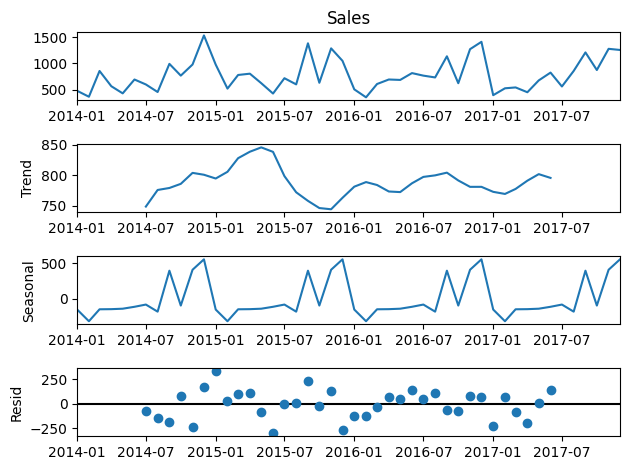

In [ ]:
# if you want to dicide which kind of model is optimal for your data we use the technique of decoposition into those different component on the basis of particular graph which we generating
#we will come to know which model is most suitable for that particular dataset.
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [ ]:
# 1st graph observer values 
# 2nd graph is  trend which indicate no trend in the data
# 3rd graph is seasonal have to remember after of steps is the seasonal compo repiting itself imp cause when we building winter holt model we have to indicate there.above pattern is repiting after 12 months
# 4th graph indicate towards error.

<ipython-input-82-7481c0725322>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1= Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.3) #slope represent the beta which show incling slop cause it has trend


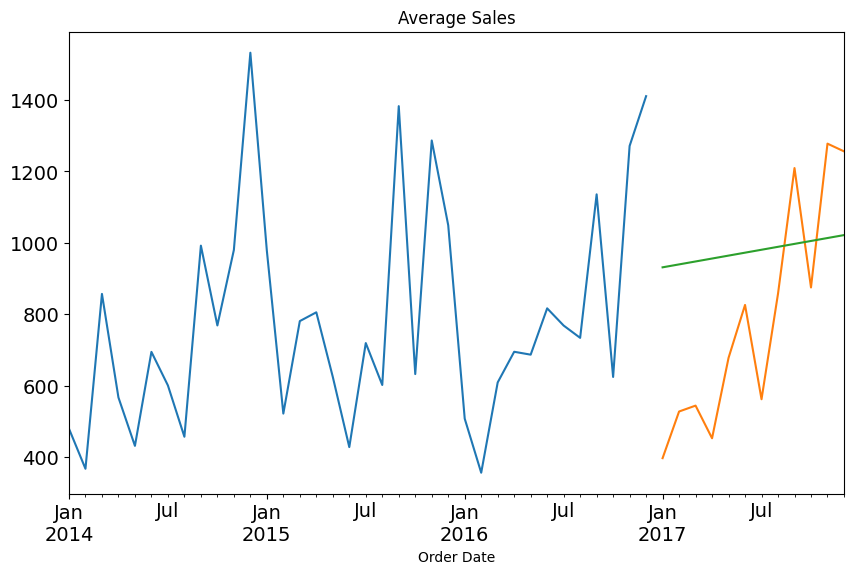

In [ ]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()

fit1= Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.3) #slope represent the beta which show incling slop cause it has trend
Holt_df ["Holt_linear"]= fit1.forecast(steps=len(test))
# validation on the basis of text data.

train.plot(figsize=(10,6),title="Average Sales", fontsize=14)
test.plot(figsize=(10,6),title="Average Sales", fontsize=14)
Holt_df["Holt_linear"].plot(figsize=(10,6), title = "Average Sales", fontsize=14)
plt.show()


In [ ]:
fit1.aic

417.08711468551803

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df.Holt_linear))
print(rms)

335.75727772374273


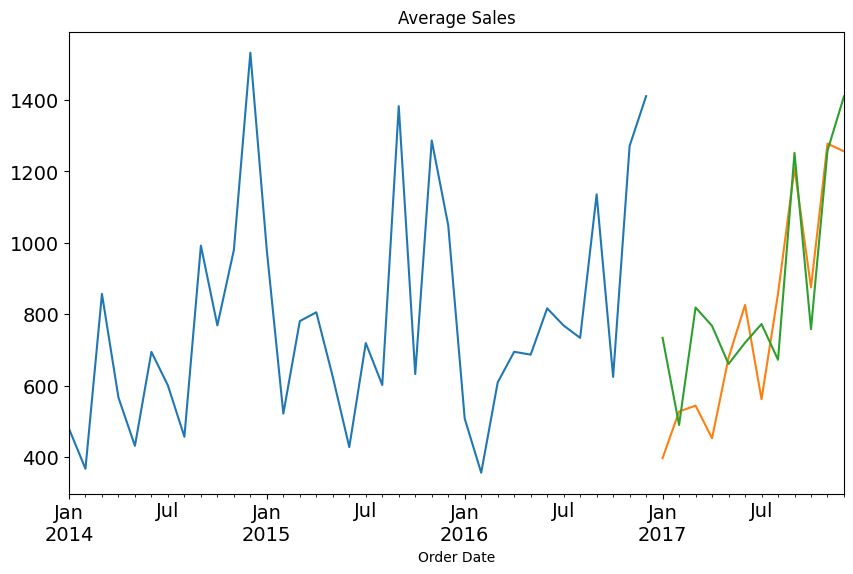

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(train,seasonal_periods=12,
                            trend = "add",
                            seasonal = "add").fit()# add is the hyperparameter
Holt_Winter_df["Holt_Winter"]= fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title = "Average Sales", fontsize=14)
test.plot(figsize=(10,6),title = "Average Sales", fontsize=14)
Holt_Winter_df["Holt_Winter"].plot(figsize=(10,6),title = "Average Sales", fontsize=14)
plt.show()

In [ ]:
fit1.aic

387.94468719832406

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df["Holt_Winter"]))
print(rms)

186.7760690213224


In [ ]:
"""
Box-jenkins Method:
1.Identification- to nidentify the optimum values for the parameters PDQ-auto_arima()
2. Estimation- to build the model using the optimum values.
3. Validaton- interpret  how good is the model by validation testing.
forecasting- Forecast for the future time periods.
"""

'\nBox-jenkins Method:\n1.Identification- to nidentify the optimum values for the parameters PDQ-auto_arima()\n2. Estimation- to build the model using the optimum values.\n3. Validaton- interpret  how good is the model by validation testing.\nforecasting- Forecast for the future time periods.\n'

In [ ]:
pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pmdarima as pm

In [ ]:
# VLAUE FOR TESTING to try and test for the best pararmeters (identification)
model = pm.auto_arima(y, start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q =3,
                      max_order=10, m=12, seasonal=True, information_criterion="aic",
                      test = "adf",trace= True, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.21 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.07 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.25 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.10 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.32 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.98 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=3.64 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=3.29 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=5.22 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=3.97 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [ ]:
model

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
# build the model (estimating)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(y, order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

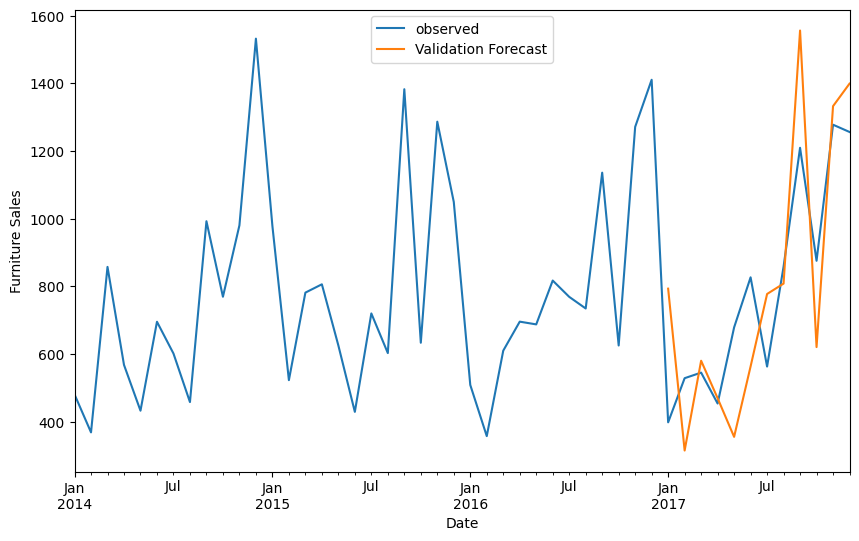

In [ ]:
#validation
pred= model.get_prediction(start=pd.to_datetime("2017-01-01"))
#pred=model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax= y["2014":].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="Validation Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()


In [ ]:
pred.predicted_mean 


Order Date
2017-01-01     792.949434
2017-02-01     314.265630
2017-03-01     579.803125
2017-04-01     468.932381
2017-05-01     354.687211
2017-06-01     562.948846
2017-07-01     777.172656
2017-08-01     807.929717
2017-09-01    1556.342103
2017-10-01     620.158822
2017-11-01    1332.648284
2017-12-01    1399.290955
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# on an aveg 1400 sales your going to do each day in this particuler year

In [ ]:
Y_pred = pred.predicted_mean
Y_test =y["2017-01-01":]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print(rms)

230.0628542195177


we will be using hold winter model cause there we are receiveing very less rms values 

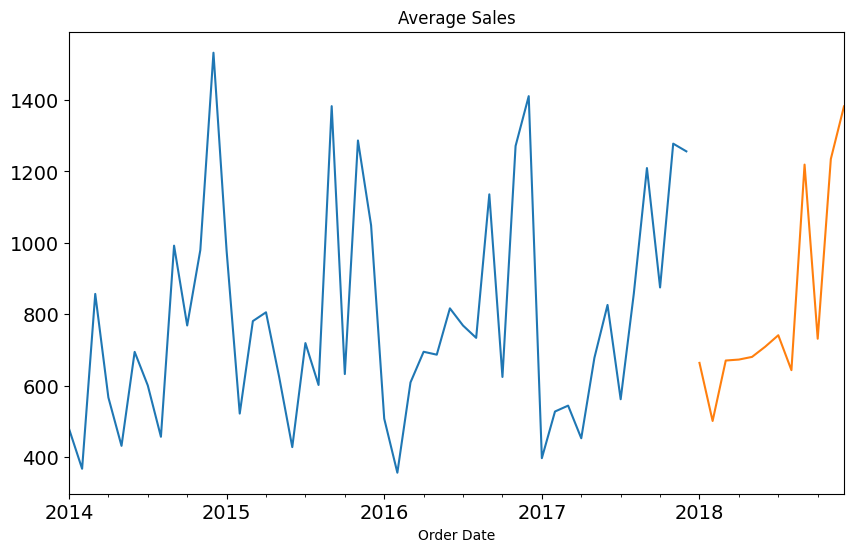

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
fit1 = ExponentialSmoothing(y,seasonal_periods=12,
                            trend = "add",
                            seasonal = "add").fit()# add is the hyperparameter
Y_predictions= fit1.forecast(steps=12)

y.plot(figsize=(10,6),title = "Average Sales", fontsize=14)
Y_predictions.plot(figsize=(10,6),title = "Average Sales", fontsize=14)
plt.show()

In [ ]:
Y_predictions

2018-01-01     664.267211
2018-02-01     501.695067
2018-03-01     670.884807
2018-04-01     673.545529
2018-05-01     681.013582
2018-06-01     709.431840
2018-07-01     741.612075
2018-08-01     643.909593
2018-09-01    1219.204068
2018-10-01     731.830479
2018-11-01    1234.892519
2018-12-01    1382.092438
Freq: MS, dtype: float64

In [ ]:
Y_predictions.to_excel("TimeseriesOutput.xlsx",index=True)